In [1]:
from preprocess import *
import matplotlib.pyplot as plt
from c_models import *

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

download the file from https://figshare.com/collections/A_large_electroencephalographic_motor_imagery_dataset_for_electroencephalographic_brain_computer_interfaces/3917698

# Input

In [3]:
file_name = "CLA-SubjectJ-170508-3St-LRHand-Inter"

In [4]:
f1 = "rawData/" + file_name + ".mat"
mat = take_input(f1)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 23 22:31:25 2018',
 '__version__': '1.0',
 '__globals__': [],
 'ans': array([[23.56322702]]),
 'o': array([[(array(['201705081338.32BEA9DD'], dtype='<U21'), array([], dtype='<U1'), array([[621892]], dtype=int32), array([[200]], dtype=uint8), array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=uint8), array([[ 0],
        [ 0],
        [ 0],
        ...,
        [92],
        [92],
        [92]], dtype=uint8), array([[-18. , -19.2, -12. , ...,  -6. ,  -8.4,  -1.2],
        [ -3.6,  -0. ,   1.8, ...,   5.4,   7.2,  -1.2],
        [ -6.6,  -8.4,  -1.2, ...,   3. ,   3. ,  -1.8],
        ...,
        [ -9. ,  -8.4,   2.4, ...,   5.4,   4.8,  -0. ],
        [ -7.2, -11.4,   3.6, ...,   4.2,   6.6,  -0. ],
        [ -2.4,  -9. ,   5.4, ...,   3.6,   6. ,  -0. ]]), array([[array(['Fp1'], dtype='<U3')],
        [array(['Fp2'], dtype='<U3')],
        [array(['F3'], dtype='<U

In [5]:
mat['o'][0][0].dtype

dtype([('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('marker_old', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')])

In [6]:
idx = 4
markers = get_markers(mat, idx) 

In [7]:
idx = 6
data = get_data(mat, idx)

In [8]:
frame_of_1 = get_trial_frames(data, markers, 1)
frame_of_2 = get_trial_frames(data, markers, 2)
frame_of_3 = get_trial_frames(data, markers, 3)


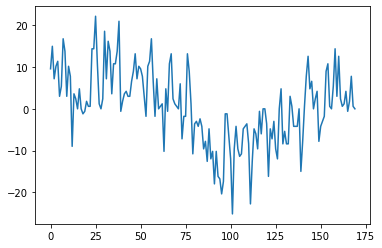

In [9]:
plt.plot(np.arange(170),frame_of_1[0][0])

In [10]:
low_pass_filter = design_filter(8, 200, 5)

In [11]:
f_signal_1 = apply_filter(low_pass_filter, frame_of_1)
f_signal_2 = apply_filter(low_pass_filter, frame_of_2)
f_signal_3 = apply_filter(low_pass_filter, frame_of_3)

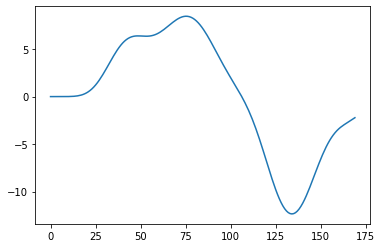

In [12]:
plt.plot(np.arange(170),f_signal_1[0][0])

In [13]:
transformed_frame_of_1 = fourier_trans(f_signal_1)
transformed_frame_of_2 = fourier_trans(f_signal_2)
transformed_frame_of_3 = fourier_trans(f_signal_3)

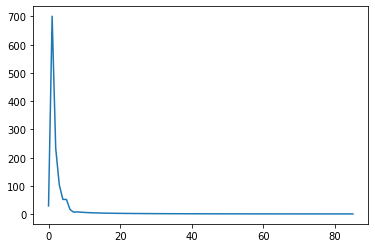

In [14]:
plt.plot(abs(transformed_frame_of_1[0][0]))

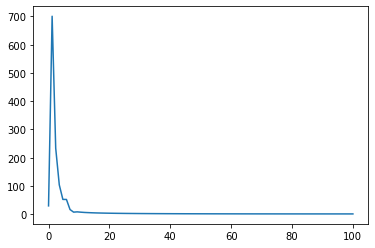

In [15]:
yf = transformed_frame_of_1[0][0]
v = np.arange(86)
t = 170/200.0
xf = v/t

fig, ax = plt.subplots()
ax.plot(xf, abs(yf))
plt.show()


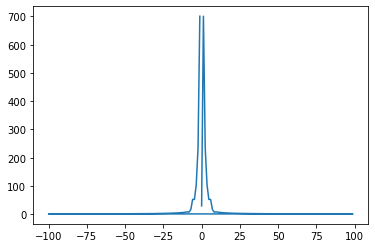

In [16]:
yf = fft.fft(f_signal_1, axis=2)
yf = yf[0][0]
xf = fft.fftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

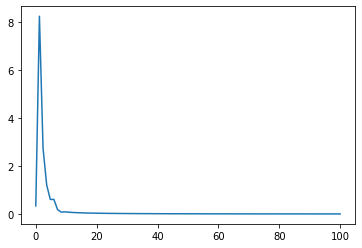

In [17]:
yf = fft.fft(f_signal_1, axis=2)
yf = yf[0][0]
xf = np.linspace(0.0, 1.0/(2.0*(1.0/200.0)), 85)
                 
fig, ax = plt.subplots()
ax.plot(xf, (2.0/170) * np.abs(yf[0:85]))
plt.show()

In [18]:
transformed_frame_of_1 = remove_phase_shift(transformed_frame_of_1)
transformed_frame_of_2 = remove_phase_shift(transformed_frame_of_2)
transformed_frame_of_3 = remove_phase_shift(transformed_frame_of_3)

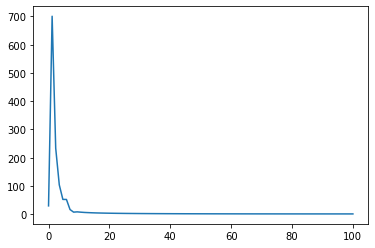

In [19]:
yf = transformed_frame_of_1[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

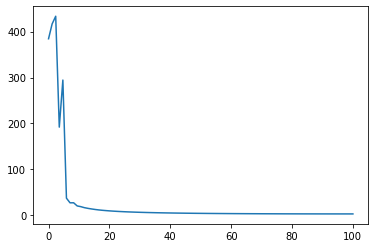

In [20]:
yf = transformed_frame_of_2[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

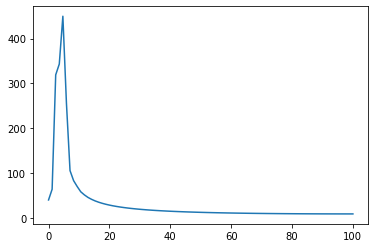

In [21]:
yf = transformed_frame_of_3[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

In [22]:
all_trials_of_1 = extract_features(transformed_frame_of_1)
all_trials_of_2 = extract_features(transformed_frame_of_2)
all_trials_of_3 = extract_features(transformed_frame_of_3)

In [23]:
print(all_trials_of_1.shape)
print(all_trials_of_2.shape)
print(all_trials_of_3.shape)

(289, 189)
(327, 189)
(284, 189)


In [24]:
trials_sets = [all_trials_of_1, all_trials_of_2, all_trials_of_3]
class_labels = [1, 2, 3]
dataset = create_dataset(trials_sets, class_labels)

In [25]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,2.955143e+01,-3.814560e+02,-5.876786e+02,2.324613e+02,-2.370038e+01,5.224769e+01,8.973794e+01,5.643299e+00,5.205341e+01,-3.518575e+02,...,9.055554e+01,-8.090578e+00,-6.840987e+00,-1.773656e+01,-4.961509e+01,1.289650e+02,8.316779e+01,-3.363778e+01,3.629881e+01,1
1,-2.377874e-76,6.266212e-16,-4.298808e-13,1.045859e-10,-7.157783e-11,-1.358070e-18,5.101787e-18,8.646782e-06,2.381686e-05,-2.859172e+02,...,5.744958e+02,-6.908767e-02,-4.247191e-02,-2.914473e-101,3.999716e-101,6.620088e-23,-2.819673e-23,-1.555595e-14,3.352284e-15,1
2,4.448533e+01,-5.862505e-04,-5.454742e-04,9.427474e-06,-4.103926e-06,8.024706e-22,7.702423e-23,-1.452498e-14,2.465818e-14,7.103956e-77,...,4.804761e+01,-5.277358e-130,1.618486e-130,-7.610122e-04,-1.246392e-03,4.656517e-24,-2.185333e-24,-6.425117e-99,-9.324583e-98,1
3,1.251172e+01,-1.045097e-06,-7.967242e-07,2.746146e+01,-4.155119e+00,3.615478e-07,1.795331e-06,-7.749852e-105,-2.631262e-105,-2.275028e+02,...,-9.214647e-78,-1.228211e-117,1.269660e-117,-2.552466e+00,-8.573592e+00,2.035261e-36,-2.690270e-36,6.949082e-73,-5.303794e-73,1
4,5.331647e+02,-1.517132e+00,-1.904634e+00,1.575693e-07,-7.874137e-08,1.511023e-08,1.100700e-08,4.898348e-15,5.038282e-15,2.642020e-76,...,2.586550e+02,-9.524071e-134,1.561549e-134,-4.919702e-23,-1.195057e-23,8.675311e-11,1.475116e-10,3.119521e-92,-1.838825e-91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1.089669e-76,-1.684552e-41,3.712734e-42,-2.135969e-01,-7.463497e-01,2.313417e-02,-4.279144e-03,1.330965e-15,2.990548e-15,-3.811290e-77,...,-7.441744e-77,-9.577091e-68,-1.173985e-67,6.771462e-41,-3.900953e-41,5.331552e-08,5.470092e-08,3.408518e-23,1.186527e-22,3
896,8.573972e-77,-9.906810e-82,-1.526761e-81,2.913879e-10,-1.051733e-09,2.253106e-13,6.364082e-14,5.017409e-23,4.063425e-22,2.444935e+02,...,1.002262e+02,-4.914076e-50,3.048128e-50,7.496597e-68,-1.947484e-66,-1.006133e-37,4.582578e-38,-6.756617e-126,-1.991478e-126,3
897,3.689290e-76,-2.062233e-95,-9.320550e-96,-1.643640e-31,-7.808346e-33,9.135763e-20,-2.255692e-19,6.150418e-19,-2.142359e-19,6.436278e+02,...,-2.705525e-76,-2.930992e-67,-3.827603e-67,-2.271150e-77,-5.382489e-77,5.084407e-67,-1.103082e-65,-1.837823e-99,-8.895091e-99,3
898,-2.836401e+02,-8.999657e-83,-1.237086e-82,2.320666e-26,-1.665507e-26,2.453651e-38,7.438282e-38,-2.394772e-87,-1.498117e-88,-3.479642e-76,...,1.251650e+03,-8.348385e-51,4.527788e-51,-3.501853e-36,1.716875e-36,-1.806077e-69,-3.523240e-68,8.170298e-54,2.695863e-55,3


In [26]:
f2 = "csvDatasets/" + file_name + ".csv"
dataset.to_csv(f2)
# !cp dataset.csv "/content/drive/MyDrive/IIT Delhi/HSL622_termPaper"

Apply different ML classification algorithms to dataset present in "dataset"
few implemented algorithms are here https://github.com/mrzResearchArena/MI-EEG/tree/master/Machine-Learning

In [27]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [28]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,-7.652111e+01,-2.037931e-40,3.534409e-42,3.751506e-16,-8.198989e-16,4.432605e-21,3.561691e-21,-1.418002e+00,2.051399e+00,-2.306623e+02,...,-2.179281e+02,-3.977771e-70,-1.742990e-70,-5.522196e-108,-8.426595e-107,-1.835282e-129,-2.094126e-129,-6.869231e-10,-1.390547e-09,2
1,1.290694e-76,-2.713728e-35,1.360487e-35,1.791488e-05,-2.892714e-04,1.381798e-04,-1.154611e-05,5.577240e-14,1.118564e-13,3.344319e+02,...,-2.347357e-76,-5.243507e-73,-4.127383e-73,4.495775e-60,-1.441433e-59,1.070168e-63,-6.921493e-63,-3.275484e-106,-6.110874e-106,3
2,-4.831509e+02,-9.829733e-91,-7.038034e-91,8.980178e-08,-4.926570e-07,4.181214e-07,-3.487459e-07,2.991714e-05,6.366007e-06,-2.771201e-76,...,4.254046e+01,-2.660691e-67,-3.359971e-67,-3.146031e-12,3.076530e-11,-3.029648e-94,-1.527944e-94,8.668678e-82,-1.569103e-81,3
3,2.464597e+02,-4.153169e-04,-3.899940e-04,1.863835e-01,-4.310005e-02,1.251957e-12,6.396419e-13,-4.685810e-15,7.671106e-15,1.325509e-76,...,5.520854e+02,-6.748606e-131,1.746235e-131,-3.314646e-122,2.758873e-123,3.073014e-42,-6.962352e-42,1.208516e-89,-4.513381e-89,1
4,3.005160e+02,-9.548446e-10,-5.437507e-10,5.283421e-06,-2.398181e-06,2.406417e-08,1.783431e-08,-1.285832e-14,2.162199e-14,2.755120e-76,...,-6.363809e-77,-1.391903e-114,1.846460e-114,-1.182449e-03,-1.928412e-03,4.272644e-30,-3.417617e-30,4.691218e-94,-4.436889e-93,1
5,4.718616e-77,-1.857062e-37,7.239998e-38,3.624163e-05,-7.908607e-04,1.132562e-10,-1.248304e-10,4.817781e+01,2.423184e+01,8.020630e+01,...,-2.347204e-77,-1.637752e-38,2.707964e-38,-4.640689e-85,-5.234581e-85,-9.515248e-100,-2.727369e-100,2.285763e-84,-5.467438e-84,3
6,3.396836e-76,-1.662959e-107,-3.053710e-108,-1.033389e-31,-6.168230e-31,1.801811e-19,1.208718e-19,2.291329e-61,-6.283829e-62,4.084984e-76,...,-3.667303e+02,2.171609e-26,-2.994953e-26,1.064851e-72,-2.893711e-73,-1.363229e-125,-2.200870e-125,-8.243192e-11,-1.636727e-10,2
7,1.349528e-75,9.827670e-24,1.326148e-24,1.516670e-54,9.084525e-55,2.601390e-26,2.768060e-26,1.108890e-09,1.622655e-09,2.109214e+03,...,-3.410498e-76,-2.039943e-77,-1.063488e-77,-8.387666e-73,-3.785445e-72,-8.730745e-78,-1.873261e-77,-2.974889e-99,-1.433382e-98,3
8,4.836008e-76,-1.117971e-28,5.710939e-29,-3.698300e-32,-1.948150e-31,2.873483e-22,-7.098361e-22,1.105798e-41,6.074041e-42,2.349792e-76,...,1.553856e-76,-3.004045e-36,1.442016e-33,-3.398897e-120,-4.776992e-120,2.248297e-42,6.321654e-42,-8.785378e-24,-5.358714e-24,2
9,-2.582960e+02,-1.381261e-84,-1.594012e-84,-3.025915e+00,-1.315152e+01,1.673712e-10,-1.804193e-10,1.936008e-13,-1.976440e-14,-1.818955e-76,...,1.511697e+02,2.429379e-49,-2.572504e-48,-2.832083e-33,1.810352e-33,-1.245413e-31,9.535032e-32,3.567337e-79,-5.278517e-79,3


In [29]:
from sklearn.model_selection import train_test_split


In [30]:
train, test = train_test_split(dataset, test_size=0.2, shuffle=False, random_state=0)

In [31]:
train

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,-7.652111e+01,-2.037931e-40,3.534409e-42,3.751506e-16,-8.198989e-16,4.432605e-21,3.561691e-21,-1.418002e+00,2.051399e+00,-2.306623e+02,...,-2.179281e+02,-3.977771e-70,-1.742990e-70,-5.522196e-108,-8.426595e-107,-1.835282e-129,-2.094126e-129,-6.869231e-10,-1.390547e-09,2
1,1.290694e-76,-2.713728e-35,1.360487e-35,1.791488e-05,-2.892714e-04,1.381798e-04,-1.154611e-05,5.577240e-14,1.118564e-13,3.344319e+02,...,-2.347357e-76,-5.243507e-73,-4.127383e-73,4.495775e-60,-1.441433e-59,1.070168e-63,-6.921493e-63,-3.275484e-106,-6.110874e-106,3
2,-4.831509e+02,-9.829733e-91,-7.038034e-91,8.980178e-08,-4.926570e-07,4.181214e-07,-3.487459e-07,2.991714e-05,6.366007e-06,-2.771201e-76,...,4.254046e+01,-2.660691e-67,-3.359971e-67,-3.146031e-12,3.076530e-11,-3.029648e-94,-1.527944e-94,8.668678e-82,-1.569103e-81,3
3,2.464597e+02,-4.153169e-04,-3.899940e-04,1.863835e-01,-4.310005e-02,1.251957e-12,6.396419e-13,-4.685810e-15,7.671106e-15,1.325509e-76,...,5.520854e+02,-6.748606e-131,1.746235e-131,-3.314646e-122,2.758873e-123,3.073014e-42,-6.962352e-42,1.208516e-89,-4.513381e-89,1
4,3.005160e+02,-9.548446e-10,-5.437507e-10,5.283421e-06,-2.398181e-06,2.406417e-08,1.783431e-08,-1.285832e-14,2.162199e-14,2.755120e-76,...,-6.363809e-77,-1.391903e-114,1.846460e-114,-1.182449e-03,-1.928412e-03,4.272644e-30,-3.417617e-30,4.691218e-94,-4.436889e-93,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-6.504000e+02,-3.236034e-83,-7.483118e-83,5.040470e-20,-1.727124e-19,7.988554e-15,3.638026e-15,-2.473176e-126,-6.780014e-127,-6.873837e+02,...,3.817846e-77,9.620388e-05,3.977411e-05,-2.620513e-14,4.715122e-14,-1.951780e-145,-4.221757e-146,2.980806e-09,-7.755414e-09,2
716,-3.165870e-76,4.087731e-15,-5.724963e-14,1.721399e-26,2.827981e-26,-1.963953e-33,1.645061e-33,-1.624224e-77,-1.527864e-76,-4.154700e+02,...,2.168409e+02,-2.029118e-104,9.336195e-104,2.531589e-84,2.118069e-83,-8.673776e-51,4.551224e-51,1.797332e-79,-2.294568e-79,1
717,4.229550e-76,-8.255397e-100,-4.406900e-100,1.425999e-06,-1.513313e-07,1.022555e-13,4.007397e-14,1.030169e-46,3.386276e-47,3.778391e-76,...,2.769934e-77,-6.929960e-68,1.530355e-68,-4.127614e-139,-7.451328e-140,-7.038834e-120,-2.159297e-119,9.523369e-13,-1.636540e-12,2
718,-1.674677e-75,8.537395e-28,-1.234565e-27,2.421131e-17,-2.926802e-17,1.880097e-44,-1.959065e-44,-1.648436e-18,1.995556e-18,-2.499094e+03,...,5.263673e+01,-1.870046e-100,4.353140e-99,-7.186789e-13,-5.565707e-13,-2.650218e-54,-4.889484e-53,2.189742e-30,3.880303e-30,1


In [32]:
test = test.reset_index(drop=True)

In [33]:
test

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,6.774084e+02,-3.658509e-15,-1.161754e-15,-2.234203e-49,-3.570310e-49,-1.361099e-18,5.602069e-18,1.085382e-53,-1.023216e-53,3.741605e-76,...,6.353515e+02,5.958215e-99,2.154629e-97,-7.610256e-101,1.059557e-100,8.259053e-05,2.780973e-05,-3.591473e-18,1.364920e-19,1
1,-5.098791e+02,-8.695633e-84,-1.944416e-83,2.482555e-16,-5.524410e-16,2.375314e-16,1.254132e-16,4.395313e-30,6.674489e-30,-6.629898e+02,...,1.239828e-76,-1.347391e-73,-3.603831e-74,-2.476464e-05,4.638225e-06,-4.622906e-120,-1.356658e-119,-6.710757e-01,-8.565707e+00,2
2,-7.474603e+01,-7.728301e-84,-9.437695e-84,5.376054e-17,-8.539955e-17,9.602870e-17,4.088333e-17,-4.432783e-31,2.391548e-30,-1.377812e-76,...,-3.248989e-76,1.594411e-43,-5.079428e-43,2.038329e-09,1.977436e-09,-3.295464e-95,-1.462509e-95,2.982885e-91,-2.275603e-90,3
3,-4.286223e+02,6.775193e-11,6.127753e-11,-6.491594e-02,-8.331186e-01,4.036113e-16,1.499913e-16,1.653951e-07,1.804537e-07,-2.321522e-76,...,8.593604e+01,-1.637153e-86,-2.237977e-87,9.729883e-34,-2.025608e-34,3.431275e-64,-2.304770e-63,5.007237e-68,-2.836178e-68,3
4,-6.108489e+02,-4.774177e-75,-2.556236e-73,1.324140e-09,3.032083e-11,5.398360e-29,8.020508e-29,-2.182393e-13,6.718919e-14,-3.947750e+02,...,4.542449e-77,1.909353e-13,1.765667e-13,-5.339021e-04,1.315704e-04,-1.013565e-12,9.188656e-13,2.973551e-12,-5.380977e-12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2.469600e-76,-2.127544e-101,-3.961401e-102,3.158993e-38,-4.928546e-39,4.060685e-07,-3.256555e-07,3.116926e-22,1.919253e-21,2.807933e+02,...,3.116940e+02,-9.625251e-59,1.828872e-59,-1.126573e-92,-6.884640e-93,2.015816e-57,-4.932614e-57,-1.183888e-108,-1.808014e-108,3
176,-2.646097e-77,-2.207125e-08,-1.471587e-08,3.406349e-01,-7.914119e-02,-3.149337e-22,7.069275e-22,-2.533592e-90,-3.348437e-90,-1.009626e+02,...,1.547784e+02,6.057408e-81,6.748593e-81,-1.590314e-87,1.575105e-85,-5.940840e-60,7.816334e-61,-2.191440e-126,-7.739605e-127,1
177,-1.895537e+03,3.551489e-52,-3.178033e-52,7.631325e-05,-6.396587e-05,-1.105146e-66,-1.735186e-67,-1.667519e-108,-2.433090e-108,-2.003017e+03,...,-1.142723e+02,1.982870e-16,-1.113400e-16,4.518902e-62,7.344210e-63,-1.849436e-120,-5.459026e-120,2.485663e-42,3.610396e-43,2
178,-3.472427e+02,1.094493e-65,-3.185684e-65,3.274418e-05,-2.777735e-05,9.824676e-16,4.769123e-16,4.780448e-46,1.683266e-46,-1.724950e+02,...,-2.361505e+02,-8.118200e-73,-2.569398e-73,3.971691e-95,-9.384924e-95,-2.158658e-06,1.104791e-06,-2.670286e-26,-1.252506e-26,2


In [34]:
X_train = train[train.columns[:-1]]
y_train = train['label']

X_test = test[test.columns[:-1]]
y_test = test['label']

In [35]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,-7.652111e+01,-2.037931e-40,3.534409e-42,3.751506e-16,-8.198989e-16,4.432605e-21,3.561691e-21,-1.418002e+00,2.051399e+00,-2.306623e+02,...,-3.909700e-30,-2.179281e+02,-3.977771e-70,-1.742990e-70,-5.522196e-108,-8.426595e-107,-1.835282e-129,-2.094126e-129,-6.869231e-10,-1.390547e-09
1,1.290694e-76,-2.713728e-35,1.360487e-35,1.791488e-05,-2.892714e-04,1.381798e-04,-1.154611e-05,5.577240e-14,1.118564e-13,3.344319e+02,...,-2.019133e-07,-2.347357e-76,-5.243507e-73,-4.127383e-73,4.495775e-60,-1.441433e-59,1.070168e-63,-6.921493e-63,-3.275484e-106,-6.110874e-106
2,-4.831509e+02,-9.829733e-91,-7.038034e-91,8.980178e-08,-4.926570e-07,4.181214e-07,-3.487459e-07,2.991714e-05,6.366007e-06,-2.771201e-76,...,8.989255e-82,4.254046e+01,-2.660691e-67,-3.359971e-67,-3.146031e-12,3.076530e-11,-3.029648e-94,-1.527944e-94,8.668678e-82,-1.569103e-81
3,2.464597e+02,-4.153169e-04,-3.899940e-04,1.863835e-01,-4.310005e-02,1.251957e-12,6.396419e-13,-4.685810e-15,7.671106e-15,1.325509e-76,...,-5.160923e-48,5.520854e+02,-6.748606e-131,1.746235e-131,-3.314646e-122,2.758873e-123,3.073014e-42,-6.962352e-42,1.208516e-89,-4.513381e-89
4,3.005160e+02,-9.548446e-10,-5.437507e-10,5.283421e-06,-2.398181e-06,2.406417e-08,1.783431e-08,-1.285832e-14,2.162199e-14,2.755120e-76,...,-4.165298e-73,-6.363809e-77,-1.391903e-114,1.846460e-114,-1.182449e-03,-1.928412e-03,4.272644e-30,-3.417617e-30,4.691218e-94,-4.436889e-93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-6.504000e+02,-3.236034e-83,-7.483118e-83,5.040470e-20,-1.727124e-19,7.988554e-15,3.638026e-15,-2.473176e-126,-6.780014e-127,-6.873837e+02,...,2.242902e-74,3.817846e-77,9.620388e-05,3.977411e-05,-2.620513e-14,4.715122e-14,-1.951780e-145,-4.221757e-146,2.980806e-09,-7.755414e-09
716,-3.165870e-76,4.087731e-15,-5.724963e-14,1.721399e-26,2.827981e-26,-1.963953e-33,1.645061e-33,-1.624224e-77,-1.527864e-76,-4.154700e+02,...,1.504899e-19,2.168409e+02,-2.029118e-104,9.336195e-104,2.531589e-84,2.118069e-83,-8.673776e-51,4.551224e-51,1.797332e-79,-2.294568e-79
717,4.229550e-76,-8.255397e-100,-4.406900e-100,1.425999e-06,-1.513313e-07,1.022555e-13,4.007397e-14,1.030169e-46,3.386276e-47,3.778391e-76,...,2.405657e-78,2.769934e-77,-6.929960e-68,1.530355e-68,-4.127614e-139,-7.451328e-140,-7.038834e-120,-2.159297e-119,9.523369e-13,-1.636540e-12
718,-1.674677e-75,8.537395e-28,-1.234565e-27,2.421131e-17,-2.926802e-17,1.880097e-44,-1.959065e-44,-1.648436e-18,1.995556e-18,-2.499094e+03,...,-4.991557e-47,5.263673e+01,-1.870046e-100,4.353140e-99,-7.186789e-13,-5.565707e-13,-2.650218e-54,-4.889484e-53,2.189742e-30,3.880303e-30


In [36]:
y_train

0      2
1      3
2      3
3      1
4      1
      ..
715    2
716    1
717    2
718    1
719    2
Name: label, Length: 720, dtype: int64

In [37]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,6.774084e+02,-3.658509e-15,-1.161754e-15,-2.234203e-49,-3.570310e-49,-1.361099e-18,5.602069e-18,1.085382e-53,-1.023216e-53,3.741605e-76,...,2.925675e-44,6.353515e+02,5.958215e-99,2.154629e-97,-7.610256e-101,1.059557e-100,8.259053e-05,2.780973e-05,-3.591473e-18,1.364920e-19
1,-5.098791e+02,-8.695633e-84,-1.944416e-83,2.482555e-16,-5.524410e-16,2.375314e-16,1.254132e-16,4.395313e-30,6.674489e-30,-6.629898e+02,...,-5.902858e-20,1.239828e-76,-1.347391e-73,-3.603831e-74,-2.476464e-05,4.638225e-06,-4.622906e-120,-1.356658e-119,-6.710757e-01,-8.565707e+00
2,-7.474603e+01,-7.728301e-84,-9.437695e-84,5.376054e-17,-8.539955e-17,9.602870e-17,4.088333e-17,-4.432783e-31,2.391548e-30,-1.377812e-76,...,-7.255297e-04,-3.248989e-76,1.594411e-43,-5.079428e-43,2.038329e-09,1.977436e-09,-3.295464e-95,-1.462509e-95,2.982885e-91,-2.275603e-90
3,-4.286223e+02,6.775193e-11,6.127753e-11,-6.491594e-02,-8.331186e-01,4.036113e-16,1.499913e-16,1.653951e-07,1.804537e-07,-2.321522e-76,...,-6.543138e-02,8.593604e+01,-1.637153e-86,-2.237977e-87,9.729883e-34,-2.025608e-34,3.431275e-64,-2.304770e-63,5.007237e-68,-2.836178e-68
4,-6.108489e+02,-4.774177e-75,-2.556236e-73,1.324140e-09,3.032083e-11,5.398360e-29,8.020508e-29,-2.182393e-13,6.718919e-14,-3.947750e+02,...,-2.050787e-70,4.542449e-77,1.909353e-13,1.765667e-13,-5.339021e-04,1.315704e-04,-1.013565e-12,9.188656e-13,2.973551e-12,-5.380977e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2.469600e-76,-2.127544e-101,-3.961401e-102,3.158993e-38,-4.928546e-39,4.060685e-07,-3.256555e-07,3.116926e-22,1.919253e-21,2.807933e+02,...,-1.118362e-53,3.116940e+02,-9.625251e-59,1.828872e-59,-1.126573e-92,-6.884640e-93,2.015816e-57,-4.932614e-57,-1.183888e-108,-1.808014e-108
176,-2.646097e-77,-2.207125e-08,-1.471587e-08,3.406349e-01,-7.914119e-02,-3.149337e-22,7.069275e-22,-2.533592e-90,-3.348437e-90,-1.009626e+02,...,1.989634e+01,1.547784e+02,6.057408e-81,6.748593e-81,-1.590314e-87,1.575105e-85,-5.940840e-60,7.816334e-61,-2.191440e-126,-7.739605e-127
177,-1.895537e+03,3.551489e-52,-3.178033e-52,7.631325e-05,-6.396587e-05,-1.105146e-66,-1.735186e-67,-1.667519e-108,-2.433090e-108,-2.003017e+03,...,2.246585e-115,-1.142723e+02,1.982870e-16,-1.113400e-16,4.518902e-62,7.344210e-63,-1.849436e-120,-5.459026e-120,2.485663e-42,3.610396e-43
178,-3.472427e+02,1.094493e-65,-3.185684e-65,3.274418e-05,-2.777735e-05,9.824676e-16,4.769123e-16,4.780448e-46,1.683266e-46,-1.724950e+02,...,-1.412280e-21,-2.361505e+02,-8.118200e-73,-2.569398e-73,3.971691e-95,-9.384924e-95,-2.158658e-06,1.104791e-06,-2.670286e-26,-1.252506e-26


In [38]:
y_test

0      1
1      2
2      3
3      3
4      2
      ..
175    3
176    1
177    2
178    2
179    1
Name: label, Length: 180, dtype: int64

In [39]:
np.array(X_test).shape

(180, 189)

# SVM (Support vector machine)

In [40]:
train_acc, test_acc, predicted_test, confusion, report = SVM_ml(X_train, y_train, X_test, y_test)

In [41]:
print(train_acc)
print(test_acc)

0.9986111111111111
1.0


In [42]:
print(confusion)

[[56  0  0]
 [ 0 71  0]
 [ 0  0 53]]


In [43]:
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        53

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



# Decision Tree

In [44]:
train_acc, test_acc, predicted_test, confusion, report = dTree_ml(X_train, y_train, X_test, y_test)

In [45]:
print(train_acc)
print(test_acc)

0.9972222222222222
0.9777777777777777


In [46]:
print(confusion)

[[53  3  0]
 [ 0 71  0]
 [ 1  0 52]]


In [47]:
print(report)

              precision    recall  f1-score   support

           1       0.98      0.95      0.96        56
           2       0.96      1.00      0.98        71
           3       1.00      0.98      0.99        53

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



# Random Forest

In [48]:
train_acc, test_acc, predicted_test, confusion, report = rforest_ml(X_train, y_train, X_test, y_test)

In [49]:
print(train_acc)
print(test_acc)

1.0
1.0


In [50]:
print(confusion)

[[56  0  0]
 [ 0 71  0]
 [ 0  0 53]]


In [51]:
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00        71
           3       1.00      1.00      1.00        53

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



# AdaBoosting

In [52]:
train_acc, test_acc, predicted_test, confusion, report = adaBoost_ml(X_train, y_train, X_test, y_test)

In [53]:
print(train_acc)
print(test_acc)

0.9958333333333333
0.9944444444444445


In [54]:
print(confusion)

[[56  0  0]
 [ 0 71  0]
 [ 1  0 52]]


In [55]:
print(report)

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        56
           2       1.00      1.00      1.00        71
           3       1.00      0.98      0.99        53

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



# Bagging

In [56]:
train_acc, test_acc, predicted_test, confusion, report = bagging_ml(X_train, y_train, X_test, y_test)

In [57]:
print(train_acc)
print(test_acc)

1.0
0.9888888888888889


In [58]:
print(confusion)

[[54  1  1]
 [ 0 71  0]
 [ 0  0 53]]


In [59]:
print(report)

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        56
           2       0.99      1.00      0.99        71
           3       0.98      1.00      0.99        53

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



# NB_classifier

## Gaussian_NB

In [60]:
train_acc, test_acc, predicted_test, confusion, report = gaussianNB_ml(X_train, y_train, X_test, y_test)

In [61]:
print(train_acc)
print(test_acc)

0.6819444444444445
0.6611111111111111


In [62]:
print(confusion)

[[51  2  3]
 [26 43  2]
 [24  4 25]]


In [63]:
print(report)

              precision    recall  f1-score   support

           1       0.50      0.91      0.65        56
           2       0.88      0.61      0.72        71
           3       0.83      0.47      0.60        53

    accuracy                           0.66       180
   macro avg       0.74      0.66      0.66       180
weighted avg       0.75      0.66      0.66       180



## Bernoulli_NB

In [64]:
train_acc, test_acc, predicted_test, confusion, report = bernoulliNB_ml(X_train, y_train, X_test, y_test)

In [65]:
print(train_acc)
print(test_acc)

0.7333333333333333
0.7888888888888889


In [66]:
print(confusion)

[[39 12  5]
 [ 4 60  7]
 [ 7  3 43]]


In [67]:
print(report)

              precision    recall  f1-score   support

           1       0.78      0.70      0.74        56
           2       0.80      0.85      0.82        71
           3       0.78      0.81      0.80        53

    accuracy                           0.79       180
   macro avg       0.79      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180



# MLP (Multi Layer perceptron) classifier

In [68]:
train_acc, test_acc, predicted_test, confusion, report = MLP_ml(X_train, y_train, X_test, y_test)

In [69]:
print(train_acc)
print(test_acc)

1.0
0.9833333333333333


In [70]:
print(confusion)

[[53  2  1]
 [ 0 71  0]
 [ 0  0 53]]


In [71]:
print(report)

              precision    recall  f1-score   support

           1       1.00      0.95      0.97        56
           2       0.97      1.00      0.99        71
           3       0.98      1.00      0.99        53

    accuracy                           0.98       180
   macro avg       0.98      0.98      0.98       180
weighted avg       0.98      0.98      0.98       180



# Quadratic Discriminant Analysis

In [72]:
train_acc, test_acc, predicted_test, confusion, report = QDA_ml(X_train, y_train, X_test, y_test)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [73]:
print(train_acc)
print(test_acc)

0.9833333333333333
0.8888888888888888


In [74]:
print(confusion)

[[53  3  0]
 [ 6 63  2]
 [ 5  4 44]]


In [75]:
print(report)

              precision    recall  f1-score   support

           1       0.83      0.95      0.88        56
           2       0.90      0.89      0.89        71
           3       0.96      0.83      0.89        53

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



# KNN

In [76]:
train_acc, test_acc, predicted_test, confusion, report = KNN_ml(X_train, y_train, X_test, y_test)

In [77]:
print(train_acc)
print(test_acc)

0.9972222222222222
0.9722222222222222


In [78]:
print(confusion)

[[53  2  1]
 [ 0 71  0]
 [ 1  1 51]]


In [79]:
print(report)

              precision    recall  f1-score   support

           1       0.98      0.95      0.96        56
           2       0.96      1.00      0.98        71
           3       0.98      0.96      0.97        53

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180

